<a href="https://colab.research.google.com/github/TonyLv/MyCode/blob/AI/Diffusers_Quicktour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install --upgrade diffusers accelerate transformers

# DiffusionPipeline

The DiffusionPipeline is the easiest way to use a pretrained diffusion system for inference. It is an end-to-end system containing the model and the scheduler. You can use the DiffusionPipeline out-of-the-box for many tasks.

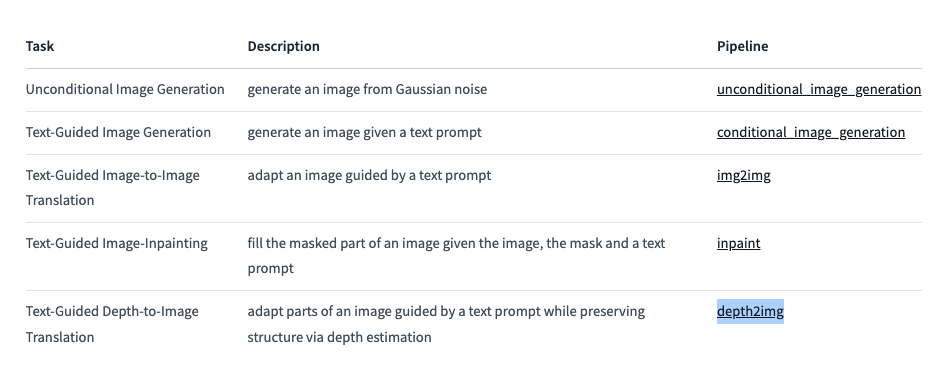

In [5]:
from diffusers import DiffusionPipeline

In [6]:
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [7]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.19.3",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [8]:
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.19.3",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

# Swapping schedulers
Different schedulers come with different denoising speeds and quality trade-offs. The best way to find out which one works best for you is to try them out!

One of the main features of 🧨 Diffusers is to allow you to easily switch between schedulers.

For example, to replace the default PNDMScheduler with the EulerDiscreteScheduler, load it with the **from_config()** method:

In [10]:
from diffusers import EulerDiscreteScheduler

In [11]:
pipeline_scheduler = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [12]:
pipeline_scheduler.scheduler = EulerDiscreteScheduler.from_config(pipeline_scheduler.scheduler.config)

In [13]:
pipeline_scheduler.to('cuda')

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.19.3",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

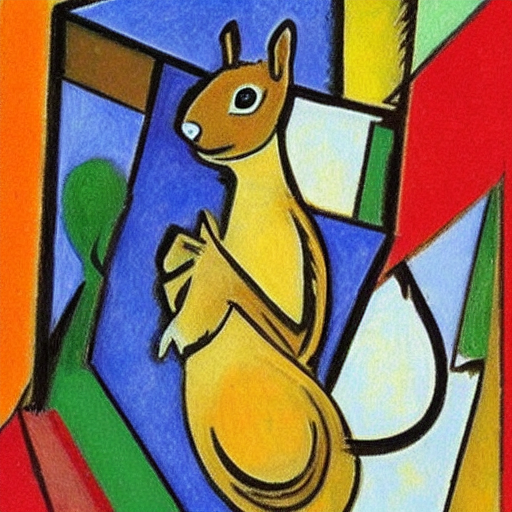

In [14]:
image_scheduler = pipeline_scheduler("An image of a squirrel in Picasso style").images[0]
image_scheduler

# Models

Most models take a noisy sample, and at each timestep it predicts the **noise residual** (other models learn to predict the previous sample directly or the velocity or **v-prediction**), the difference between a less noisy image and the input image. You can mix and match models to create other diffusion systems

Models are initiated with the **from_pretrained()** method which also locally caches the model weights so it is faster the next time you load the model.

For the quicktour, you’ll load the UNet2DModel, a basic unconditional image generation model with a checkpoint trained on cat images:

In [15]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id)

In [16]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
            ('upsample_type', 'conv'),
            ('act_fn', 'silu'),
            ('attention_

The model configuration is a 🧊 frozen 🧊 dictionary, which means those parameters can’t be changed after the model is created.

This is intentional and ensures that the parameters used to define the model architecture at the start remain the same, while other parameters can still be adjusted during inference.

Some of the most important parameters are:

- **sample_size**: the height and width dimension of the input sample.
- **in_channels**: the number of input channels of the input sample.
- **down_block_types** and **up_block_types**: the type of down- and - - upsampling blocks used to create the UNet architecture.
- **block_out_channels**: the number of output channels of the downsampling blocks; also used in reverse order for the number of input channels of the upsampling blocks.
- **layers_per_block**: the number of ResNet blocks present in each UNet block.

To use the model for inference, create the image shape with random Gaussian noise.

It should have a batch axis because the model can receive multiple random noises, a channel axis corresponding to the number of input channels, and a **sample_size** axis for the height and width of the image:

In [17]:
import torch
torch.manual_seed(0)

In [18]:
noisy_sample = torch.randn(1, model.config.in_channels,
                           model.config.sample_size,
                           model.config.sample_size)

In [19]:
noisy_sample.shape

torch.Size([1, 3, 256, 256])

For inference, pass the noisy image to the model and a timestep.

The timestep indicates how noisy the input image is, with more noise at the beginning and less at the end.

This helps the model determine its position in the diffusion process, whether it is closer to the start or the end.

Use the sample method to get the model output:

In [20]:
with torch.no_grad():
  noisy_residual = model(sample=noisy_sample, timestep=2).sample

# Schedulers

Schedulers manage going from a noisy sample to a less noisy sample given the model output - in this case, it is the noisy_residual.

In [21]:
from diffusers import DDPMScheduler

In [22]:
scheduler = DDPMScheduler.from_config(repo_id)
scheduler

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:217: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.19.3",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

Some of the most important parameters are:

- **num_train_timesteps**: the length of the denoising process or in other words, the number of timesteps required to process random Gaussian noise into a data sample.
- **beta_schedule**: the type of noise schedule to use for inference and training.
- **beta_start** and **beta_end**: the start and end noise values for the noise schedule.

In [23]:
less_noisy_sample = scheduler.step(model_output=noisy_residual,
                                   timestep=2,
                                   sample=noisy_sample).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

The **less_noisy_sample** can be passed to the next timestep where it’ll get even less noisier!

Let’s bring it all together now and visualize the entire denoising process.

In [24]:
import PIL.Image
import numpy as np

In [25]:
def display_sample(sample, i):
  image_processed = sample.cpu().permute(0, 2, 3, 1)
  image_processed = (image_processed + 1.0) * 127.5
  image_processed = image_processed.numpy().astype(np.uint8)
  image_pil = PIL.Image.fromarray(image_processed[0])
  display(f"Image at step {i}")
  display(image_pil)

In [26]:
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

In [27]:
import tqdm
sample = noisy_sample

  5%|▍         | 49/1000 [00:05<01:55,  8.20it/s]

'Image at step 50'

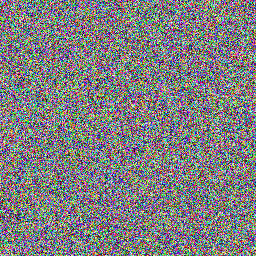

 10%|▉         | 99/1000 [00:11<01:49,  8.19it/s]

'Image at step 100'

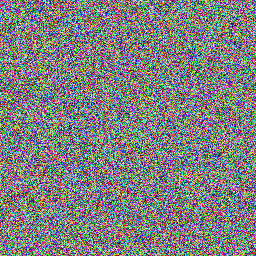

 15%|█▍        | 149/1000 [00:18<01:43,  8.25it/s]

'Image at step 150'

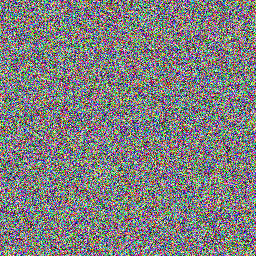

 20%|█▉        | 199/1000 [00:24<01:38,  8.14it/s]

'Image at step 200'

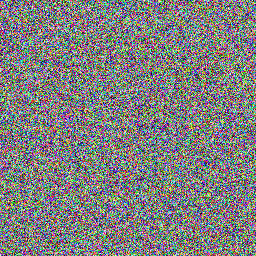

 25%|██▍       | 249/1000 [00:30<01:34,  7.97it/s]

'Image at step 250'

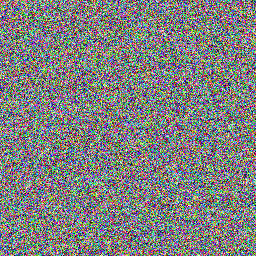

 30%|██▉       | 299/1000 [00:36<01:26,  8.14it/s]

'Image at step 300'

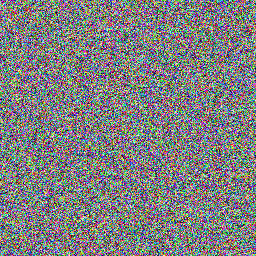

 35%|███▍      | 349/1000 [00:42<01:21,  8.00it/s]

'Image at step 350'

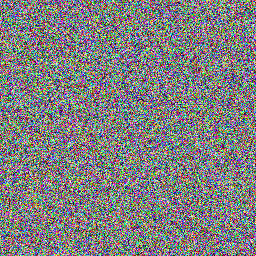

 40%|███▉      | 399/1000 [00:49<01:17,  7.77it/s]

'Image at step 400'

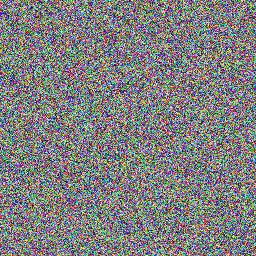

 45%|████▍     | 449/1000 [00:55<01:09,  7.90it/s]

'Image at step 450'

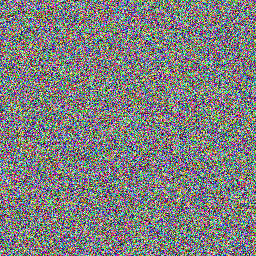

 50%|████▉     | 499/1000 [01:01<01:03,  7.84it/s]

'Image at step 500'

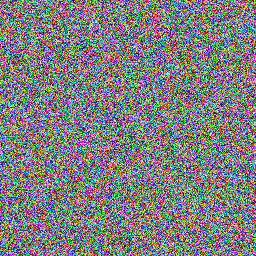

 55%|█████▍    | 549/1000 [01:08<00:56,  7.97it/s]

'Image at step 550'

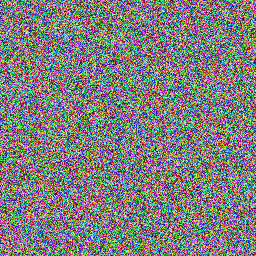

 60%|█████▉    | 599/1000 [01:14<00:57,  7.02it/s]

'Image at step 600'

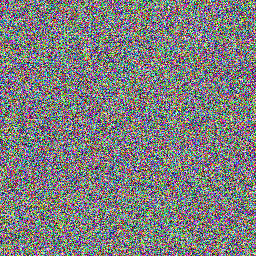

 65%|██████▍   | 649/1000 [01:21<00:43,  7.98it/s]

'Image at step 650'

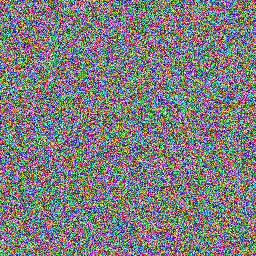

 70%|██████▉   | 699/1000 [01:27<00:37,  8.12it/s]

'Image at step 700'

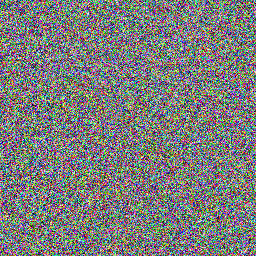

 75%|███████▍  | 749/1000 [01:34<00:31,  8.05it/s]

'Image at step 750'

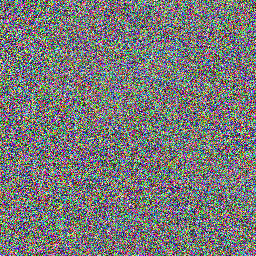

 80%|███████▉  | 799/1000 [01:40<00:24,  8.13it/s]

'Image at step 800'

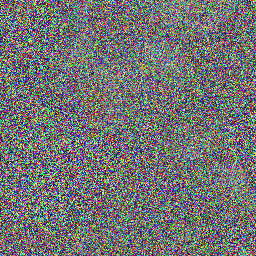

 85%|████████▍ | 849/1000 [01:46<00:18,  8.10it/s]

'Image at step 850'

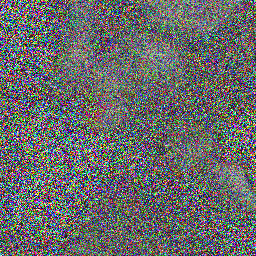

 90%|████████▉ | 899/1000 [01:52<00:13,  7.75it/s]

'Image at step 900'

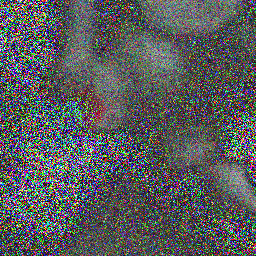

 95%|█████████▍| 949/1000 [01:59<00:06,  8.03it/s]

'Image at step 950'

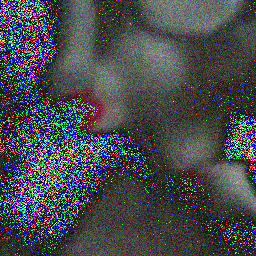

100%|█████████▉| 999/1000 [02:05<00:00,  8.01it/s]

'Image at step 1000'

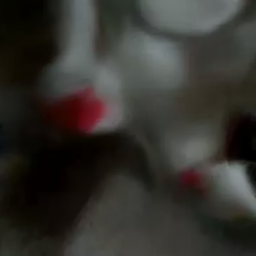

100%|██████████| 1000/1000 [02:05<00:00,  7.95it/s]


In [28]:
for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
  # 1. predict noise residual
  with torch.no_grad():
    residual = model(sample, t).sample

  # 2. compute less noisy image and set x_t -> x_t-1
  sample = scheduler.step(residual, t, sample).prev_sample
  # 3. optionally look at image
  if (i + 1) % 50 == 0:
    display_sample(sample, i + 1)